In [80]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [142]:
a = 1.0
b = 1.0
c = 1.0
d = 1.0
xd = 1
yd = 1
k = 10

In [143]:
# define the function
def LV(x,t):
    u = x[0]
    v = x[1]
    dudt = a*u - b*u*v
    dvdt = -c*v +d*u*v
    return [dudt,dvdt]

In [144]:
# Compute the Energy-Balancing Passivity Based Control (EB-PBC) action
# xd: desired prey population
# yd: desired predator population
# k: dissipation rate of the damping injection controller
def ebPBC(q,xd,yd,k): 
    beta1 = d*xd - c
    beta2 = b*yd - a
    v = -k*(b*yd -b*np.exp(q))
    return [-beta1,beta2+v]

In [145]:
# define the function in Hamiltonian form
def HLV(x,t):
    q = x[0]
    p = x[1]
    u = ebPBC(q,xd,yd,k)
    dpdt = a - b*np.exp(q) - u[0]
    dqdt = -c + d*np.exp(p) - u[1]
    return [dqdt,dpdt]

In [146]:
# test the functions
print(LV([0.5,0.5],0))
print(HLV([0.5,0.5],0))

[0.25, -0.25]
[-5.838491436301154, -0.6487212707001282]


In [147]:
# Simulate the systems

t = np.linspace(0,250,10000)
# standard form
x0 = [0.5,0.5]
x = odeint(LV,x0,t)
# hamiltonian form
xi0 = [np.log(0.5),np.log(0.5)]
xi = odeint(HLV,xi0,t)

In [148]:
u = x[:,0]
v = x[:,1]
q = xi[:,0]
p = xi[:,1]

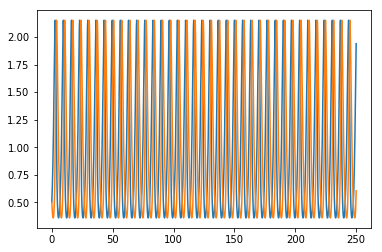

In [149]:
# Results in standard form
plt.plot(t,u)
plt.plot(t,v)

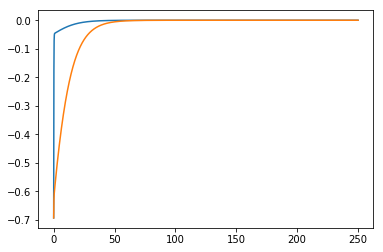

In [150]:
# Results in Hamiltonian form
plt.plot(t,q)
plt.plot(t,p)

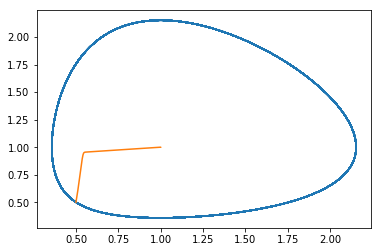

In [151]:
# Comparison between uncontrolled and controlled systems in standard forms
plt.plot(u,v)
plt.plot(np.exp(p),np.exp(q))